In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import os
os.chdir('open')
os.listdir()
#os.getcwd()

['sample_submission.csv', 'test.csv', 'train.csv']

In [6]:
train = pd.read_csv('train.csv')
train.columns

Index(['ID', 'User-ID', 'Book-ID', 'Book-Rating', 'Age', 'Location',
       'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher'],
      dtype='object')

In [43]:
train = pd.read_csv('train.csv')
# cols = list(train.columns)
# cols.remove('Book-Rating')
# cols.append('Book-Rating')
# train.columns = cols
train = train[['ID', 'User-ID', 'Book-ID', 'Age', 'Location',
               'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Book-Rating'
              ]]

In [42]:
train2 = pd.read_csv('train.csv')
# cols = list(train.columns)
# cols.remove('Book-Rating')
# cols.append('Book-Rating')
# train.columns = cols
train2= train2[['ID', 'User-ID', 'Book-ID', 'Age', 'Location',
               'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Book-Rating'
              ]]

train2.head()

,ID,User-ID,Book-ID,Age,Location,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating
0,TRAIN_000000,USER_00000,BOOK_044368,23.0,"sackville, new brunswick, canada",Road Taken,Rona Jaffe,2001.0,Mira,8
1,TRAIN_000001,USER_00000,BOOK_081205,23.0,"sackville, new brunswick, canada",Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,8
2,TRAIN_000002,USER_00000,BOOK_086781,23.0,"sackville, new brunswick, canada",Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,0
3,TRAIN_000003,USER_00000,BOOK_098622,23.0,"sackville, new brunswick, canada",Mother Earth Father Sky,Sue Harrison,1991.0,Avon,0
4,TRAIN_000004,USER_00000,BOOK_180810,23.0,"sackville, new brunswick, canada",She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,8


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 871393 entries, 0 to 871392
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   871393 non-null  object 
 1   User-ID              871393 non-null  object 
 2   Book-ID              871393 non-null  object 
 3   Age                  871393 non-null  float64
 4   Location             871393 non-null  object 
 5   Book-Title           871393 non-null  object 
 6   Book-Author          871393 non-null  object 
 7   Year-Of-Publication  871393 non-null  float64
 8   Publisher            871393 non-null  object 
 9   Book-Rating          871393 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 66.5+ MB


In [9]:
train.isnull().sum()

ID                     0
User-ID                0
Book-ID                0
Age                    0
Location               0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Book-Rating            0
dtype: int64

일단, 결측치는 없음

### Book Rating 분포 확인

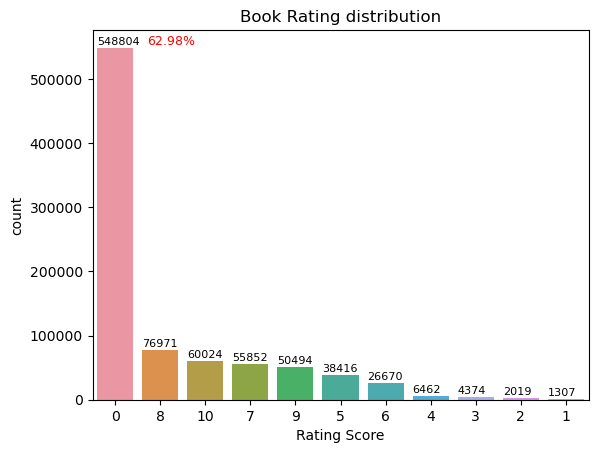

In [10]:
rating = train['Book-Rating'].value_counts().sort_values(ascending = False).reset_index().set_index('index')
str_i = [str(i) for i in rating.index]
rating.index = str_i


rating
#plt.figure(figsize = (12,8))
ax = sns.barplot(y = rating['Book-Rating'], x= rating.index)
ax.set_title('Book Rating distribution')
ax.set_xlabel('Rating Score')
ax.set_ylabel('count')

zero_rate = f"{rating['Book-Rating'][0] / len(train)*100:.2f}%"
for i in ax.patches:
    ax.text(x = i.get_x(), y = i.get_height() + 5000, s = round(i.get_height()), fontsize = 8)
ax.text(ax.patches[0].get_width()-0.1, ax.patches[0].get_height()+5000, zero_rate, fontsize = 9, color = 'red')
plt.show()

타겟값인 Book rating은 0~10 점의 범위를 가지는데,
0점이 62.98%를 차지할 정도로 큰 비중

0점 : 유저가 해당 도서에 관심이 없는 경우

### Location 정리

In [44]:
City = [i.split(',')[0].strip().lower() for i in train['Location']]
State = [i.split(',')[1].strip().lower() for i in train['Location']]
Country = [i.split(',')[2].strip().lower() for i in train['Location']]

train['City'] = City
train['State'] = State
train['Country'] = Country

train.drop(['Location'], axis = 1, inplace= True)

In [45]:
train

,ID,User-ID,Book-ID,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher,Book-Rating,City,State,Country
0,TRAIN_000000,USER_00000,BOOK_044368,23.0,Road Taken,Rona Jaffe,2001.0,Mira,8,sackville,new brunswick,canada
1,TRAIN_000001,USER_00000,BOOK_081205,23.0,Macbeth (New Penguin Shakespeare),William Shakespeare,1981.0,Penguin Books,8,sackville,new brunswick,canada
2,TRAIN_000002,USER_00000,BOOK_086781,23.0,Waverley (Penguin English Library),Walter Scott,1981.0,Penguin Books,0,sackville,new brunswick,canada
3,TRAIN_000003,USER_00000,BOOK_098622,23.0,Mother Earth Father Sky,Sue Harrison,1991.0,Avon,0,sackville,new brunswick,canada
4,TRAIN_000004,USER_00000,BOOK_180810,23.0,She Who Remembers,Linda Lay Shuler,1989.0,Signet Book,8,sackville,new brunswick,canada
...,...,...,...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,34.0,Healing Words: The Power of Prayer and the Pra...,Larry Dossey,1993.0,Harpercollins,0,minneapolis,minnesota,usa
871389,TRAIN_871389,USER_92097,BOOK_258124,35.0,The Salmon of Doubt: Hitchhiking the Galaxy On...,DOUGLAS ADAMS,2002.0,Harmony,0,temple,texas,usa
871390,TRAIN_871390,USER_92098,BOOK_071848,45.0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,2000.0,Thorndike Press,0,ottawa,ontario,canada
871391,TRAIN_871391,USER_92099,BOOK_252599,43.0,Heartbreak Hill: Anatomy of a Ryder Cup,Tim Rosaforte,1996.0,St Martins Pr,8,maple grove,minnesota,usa


Location이 콤마 3개의 단어로 이루어져 있어서 [City, State, Country]로 나누고

원본 train 데이터에서 Location 칼럼은 삭제

In [12]:
print('=============city============')
print(train['City'].value_counts())

print('\n\n=============state============')
print(train['State'].value_counts())

print('\n\n=============country============')
print(train['Country'].value_counts())

=============city============
n/a                      13732
toronto                  12516
chicago                   7661
seattle                   7144
ottawa                    7108
                         ...  
remseck                      1
kardamili                    1
not sure                     1
sanur                        1
castiglion fiorentino        1
Name: City, Length: 13817, dtype: int64


=============state============
california    91579
texas         36901
ontario       34633
missouri      28357
florida       28305
              ...  
pará              1
kunsan            1
setubal           1
rehka             1
nagasaki          1
Name: State, Length: 1810, dtype: int64


=============country============
usa                   628756
canada                 78500
united kingdom         26075
germany                23468
                       21136
                       ...  
macau                      1
baden-wuerttemberg         1
united sates               1


city에 문자열로 'n/a'라고 등록되어있는 결측치가 많다

In [13]:
cnt = 0
def process_country(country:str):
    global cnt
    if country in ['jersey','new jersey','united staes','united state','united sates','usa (currently living in england)','u.s. of a.','u.s.a','u.s>','vanwert','mericopa','us','usofa','usacurrentlylivinginengland','unitedstate','unitedstates','hungaryandusa','unitedsates','america','ee.uu','eeuu','unitedstaes','georgia']:
        cnt +=1 
        return 'usa'
    
    elif country in ['united kindgonm','england','unitedkingdom','unitedkindgonm','wales', 'u.k.']:
        cnt +=1
        return 'uk'
    
    elif country in ['unitedarabemirates']:
        cnt +=1
        return 'uae'
    
    elif country in ['pender','cananda'] :
        cnt +=1
        return 'canada'
    
    elif country in ['italia', 'litalia'] :
        cnt +=1
        return 'italia'
    
    elif country in ["" , "na","k1c7b1","the","ysa","everywhereandanywhere", 'c','x','saintloius','hereandthere','space'] :
        cnt +=1
        return 'unknown'
    elif country in ['espaa','madrid','catalonia','catalunyaspain' ,'catalunya'] :
        cnt +=1
        return 'spain'
    
    elif country in ['lafrance', 'bergued']:
        cnt +=1
        return 'france'
    
    elif country in ['newzealand']:
        cnt +=1
        return 'nz'
    return country

train['Country'] = train['Country'].apply(lambda x : process_country(x))

In [14]:
print(cnt)
print(cnt / len(train) * 100)

22563
2.5893024157871363


country에서 잘못된 이름이 너무 많아 이를 하나하나 보며 교정하였음

country중에서 오탈자, 여러 이름으로 작성된 국가명 처리

약 87만 1393개의 데이터 중 22563개의 country명(전체 데이터의 2.6%)을 교정

In [15]:
train.drop(['City', 'State'], axis = 1, inplace = True)

### Age

In [16]:
np.sort(train['Age'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  89.,
        90.,  92.,  93.,  96.,  97.,  98.,  99., 100., 101., 103., 104.,
       105., 107., 108., 109., 114., 116., 118., 123., 124., 127., 128.,
       132., 136., 138., 140., 141., 146., 147., 148., 151., 152., 157.,
       168., 199., 200., 201., 204., 209., 212., 219., 220., 223., 226.,
       228., 229., 237., 239., 244.])

In [17]:
train['Age'].value_counts().sort_index()

0.0      495
1.0      361
2.0      278
3.0      128
4.0      250
        ... 
228.0     48
229.0     11
237.0      2
239.0    116
244.0      7
Name: Age, Length: 137, dtype: int64

In [18]:
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,70,250]
labels = ['0-5', '6-10','11-15','16-20','21-25', '25-30','31-35', "35-40", '41-45','45-50','51-55','56-60','61-70','70+']

train['Age_group'] = pd.cut(train['Age'], bins = bins, labels = labels)

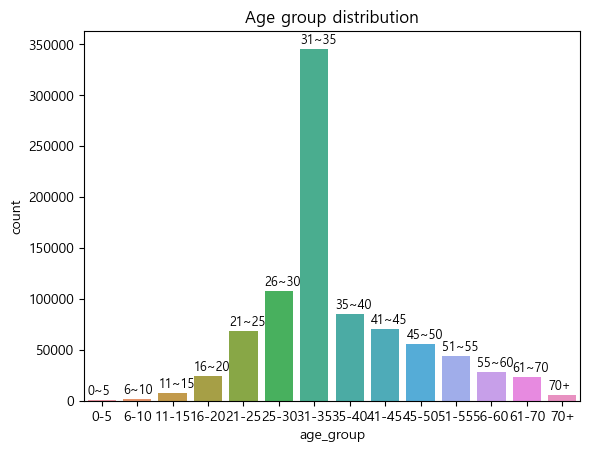

In [19]:
plt.rc("font", family = "Malgun Gothic")
age_group = train['Age_group'].value_counts()
ax = sns.barplot(y = age_group, x = age_group.index)

ax.set_title('Age group distribution')
ax.set_xlabel('age_group')
ax.set_ylabel('count')

age_label = ['0~5', '6~10', '11~15', '16~20', '21~25', '26~30', '31~35', '35~40','41~45','45~50', '51~55','55~60', '61~70', '70+']

for i,j in zip(ax.patches, age_label):
    ax.text(x = i.get_x(), y = i.get_height()+5000, s= j, fontsize = 9)

plt.show()

20대~40대 초반까지 rating 평점을 매긴 사람들이 몰려있다

특히 30대 초중반의 유저들의 평이 월등히 많았다

In [20]:
def age_(age):
    if (age < 10):
        return 1
    elif(age < 20):
        return 2
    elif(age < 30):
        return 3
    elif(age < 40):
        return 4
    elif(age < 50):
        return 5
    elif(age < 60):
        return 6
    elif(age < 70):
        return 7
    elif(age < 80):
        return 8
    elif(age < 90):
        return 9
    else: # abnormal
        return 10
    
train['Age_cat'] = train.apply(lambda x: age_(x['Age']), axis = 1)
train.drop(['Age'], axis = 1, inplace = True)

In [21]:
train.drop(['Age_group'], axis = 1, inplace = True)

Age를 10대, 20대, 30대,,, 별로 카테고리화해서

원본 데이터의 Age 칼럼은 삭제하고, Age_cat을 추가

In [47]:
train[['Book-ID', 'Book-Title']]

,Book-ID,Book-Title
0,BOOK_044368,Road Taken
1,BOOK_081205,Macbeth (New Penguin Shakespeare)
2,BOOK_086781,Waverley (Penguin English Library)
3,BOOK_098622,Mother Earth Father Sky
4,BOOK_180810,She Who Remembers
...,...,...
871388,BOOK_081138,Healing Words: The Power of Prayer and the Pra...
871389,BOOK_258124,The Salmon of Doubt: Hitchhiking the Galaxy On...
871390,BOOK_071848,Harry Potter and the Prisoner of Azkaban (Book 3)
871391,BOOK_252599,Heartbreak Hill: Anatomy of a Ryder Cup


In [22]:
bookid_title = train[['Book-ID', 'Book-Title']].drop_duplicates().groupby('Book-ID').count().values
np.unique(bookid_title)

train.drop(['Book-Title'], axis = 1, inplace = True)

Book-ID를 기준으로 Book-Title은 고윳값일 것이라고 예상

-> 확인해보니 Book-ID에 따른 Book-Title은 고윳값이기 때문에 Book-Title을 칼럼에서 삭제

In [23]:
train

,ID,User-ID,Book-ID,Book-Author,Year-Of-Publication,Publisher,Book-Rating,Country,Age_cat
0,TRAIN_000000,USER_00000,BOOK_044368,Rona Jaffe,2001.0,Mira,8,canada,3
1,TRAIN_000001,USER_00000,BOOK_081205,William Shakespeare,1981.0,Penguin Books,8,canada,3
2,TRAIN_000002,USER_00000,BOOK_086781,Walter Scott,1981.0,Penguin Books,0,canada,3
3,TRAIN_000003,USER_00000,BOOK_098622,Sue Harrison,1991.0,Avon,0,canada,3
4,TRAIN_000004,USER_00000,BOOK_180810,Linda Lay Shuler,1989.0,Signet Book,8,canada,3
...,...,...,...,...,...,...,...,...,...
871388,TRAIN_871388,USER_92096,BOOK_081138,Larry Dossey,1993.0,Harpercollins,0,usa,4
871389,TRAIN_871389,USER_92097,BOOK_258124,DOUGLAS ADAMS,2002.0,Harmony,0,usa,4
871390,TRAIN_871390,USER_92098,BOOK_071848,J. K. Rowling,2000.0,Thorndike Press,0,canada,5
871391,TRAIN_871391,USER_92099,BOOK_252599,Tim Rosaforte,1996.0,St Martins Pr,8,usa,5


### Year of Publication

In [24]:
train['Year-Of-Publication'].value_counts().sort_index()

-1.0       11515
 1376.0        1
 1378.0        1
 1806.0        1
 1897.0        1
           ...  
 2010.0        4
 2011.0        7
 2012.0        1
 2020.0        8
 2021.0       51
Name: Year-Of-Publication, Length: 110, dtype: int64

In [25]:
sorted(list(train['Year-Of-Publication'].unique()))

[-1.0,
 1376.0,
 1378.0,
 1806.0,
 1897.0,
 1900.0,
 1901.0,
 1902.0,
 1904.0,
 1906.0,
 1908.0,
 1909.0,
 1910.0,
 1911.0,
 1914.0,
 1917.0,
 1919.0,
 1920.0,
 1921.0,
 1922.0,
 1923.0,
 1924.0,
 1925.0,
 1926.0,
 1927.0,
 1928.0,
 1929.0,
 1930.0,
 1931.0,
 1932.0,
 1933.0,
 1934.0,
 1935.0,
 1936.0,
 1937.0,
 1938.0,
 1939.0,
 1940.0,
 1941.0,
 1942.0,
 1943.0,
 1944.0,
 1945.0,
 1946.0,
 1947.0,
 1948.0,
 1949.0,
 1950.0,
 1951.0,
 1952.0,
 1953.0,
 1954.0,
 1955.0,
 1956.0,
 1957.0,
 1958.0,
 1959.0,
 1960.0,
 1961.0,
 1962.0,
 1963.0,
 1964.0,
 1965.0,
 1966.0,
 1967.0,
 1968.0,
 1969.0,
 1970.0,
 1971.0,
 1972.0,
 1973.0,
 1974.0,
 1975.0,
 1976.0,
 1977.0,
 1978.0,
 1979.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2008.0,
 2010.0,
 2011.0,
 2012.0,
 2020.0,
 2021.0]

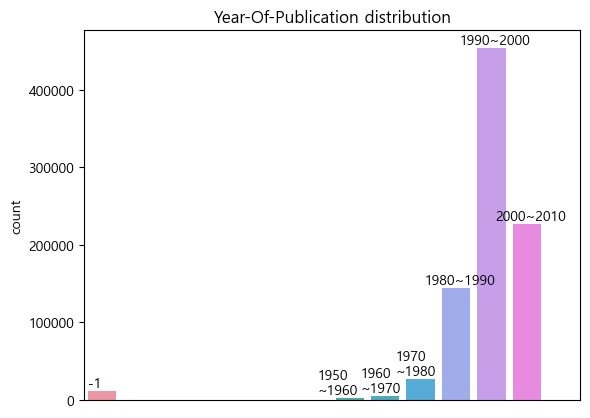

In [26]:
plt.gca().axes.xaxis.set_visible(False)
bins = [-5,100, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980,1990, 2000,2010, 2022]
yop_group = pd.cut(train['Year-Of-Publication'], bins = bins)

yop_cnts = yop_group.value_counts().reset_index()



ax = sns.barplot(y = yop_cnts['Year-Of-Publication'], x = yop_cnts['index'])
ax.text(ax.patches[0].get_x(),ax.patches[0].get_height()+5000, '-1')
ax.text(ax.patches[-2].get_x()-0.5,ax.patches[-2].get_height()+5000, '2000~2010')
ax.text(ax.patches[-3].get_x()-0.5,ax.patches[-3].get_height()+5000, '1990~2000')
ax.text(ax.patches[-4].get_x()-0.5,ax.patches[-4].get_height()+5000, '1980~1990')
ax.text(ax.patches[-5].get_x()-0.3,ax.patches[-5].get_height()+5000, '1970\n~1980')
ax.text(ax.patches[-6].get_x()-0.3,ax.patches[-6].get_height()+5000, '1960\n~1970')
ax.text(ax.patches[-7].get_x()-0.5,ax.patches[-7].get_height()+5000, '1950\n~1960')


ax.set_title('Year-Of-Publication distribution')
ax.set_xlabel('year group')
ax.set_ylabel('count')

plt.show()

In [27]:
print(yop_cnts.iloc[0, 1] / len(train) * 100)
print(yop_cnts.iloc[4][1]/len(train)*100)
yop_cnts.iloc[4][1]

52.07581424225349
1.321447383671891


11515

1990~2000년대가 52%로 가장 많았고
출판연도가 '-1'로 기록된 이상치도 11515개로 적지 않았음

In [28]:
def yop_(yop):
    if(yop < 1910):
        return 1
    elif(yop < 1920):
        return 2
    elif(yop < 1930):
        return 3
    elif(yop < 1940):
        return 4
    elif(yop < 1950):
        return 5
    elif(yop < 1960):
        return 6
    elif(yop < 1970):
        return 7
    elif(yop < 1980):
        return 8
    elif(yop < 1990):
        return 9
    elif(yop < 2000):
        return 10
    elif(yop>= 2000):
        return 11
    else: #abnormal
        print(yop)
        return 12
    
train['YOP_cat'] = train.apply(lambda x: yop_(x['Year-Of-Publication']), axis = 1)
train.drop(['Year-Of-Publication'], axis = 1, inplace = True)

In [29]:
train.drop('ID', axis = 1, inplace= True)
train

,User-ID,Book-ID,Book-Author,Publisher,Book-Rating,Country,Age_cat,YOP_cat
0,USER_00000,BOOK_044368,Rona Jaffe,Mira,8,canada,3,11
1,USER_00000,BOOK_081205,William Shakespeare,Penguin Books,8,canada,3,9
2,USER_00000,BOOK_086781,Walter Scott,Penguin Books,0,canada,3,9
3,USER_00000,BOOK_098622,Sue Harrison,Avon,0,canada,3,10
4,USER_00000,BOOK_180810,Linda Lay Shuler,Signet Book,8,canada,3,9
...,...,...,...,...,...,...,...,...
871388,USER_92096,BOOK_081138,Larry Dossey,Harpercollins,0,usa,4,10
871389,USER_92097,BOOK_258124,DOUGLAS ADAMS,Harmony,0,usa,4,11
871390,USER_92098,BOOK_071848,J. K. Rowling,Thorndike Press,0,canada,5,11
871391,USER_92099,BOOK_252599,Tim Rosaforte,St Martins Pr,8,usa,5,10


In [30]:
from sklearn.preprocessing import LabelEncoder

cat_cols = train.select_dtypes(include = [object]).columns

for col in cat_cols:
    encoder = LabelEncoder()
    encoder.fit(train[col])
    train[col] = encoder.transform(train[col])

In [31]:
X = train.drop('Book-Rating', axis =1)
y = train[['Book-Rating']]

In [32]:
X

,User-ID,Book-ID,Book-Author,Publisher,Country,Age_cat,YOP_cat
0,0,39921,77475,9093,54,3,11
1,0,73045,91647,10515,54,3,9
2,0,78014,90102,10515,54,3,9
3,0,88719,83754,1166,54,3,10
4,0,162881,54167,12609,54,3,9
...,...,...,...,...,...,...,...
871388,83251,72982,52004,6162,298,4,10
871389,83252,232668,16876,6091,298,4,11
871390,83253,64665,36822,13698,54,5,11
871391,83254,227657,87010,12989,298,5,10


In [33]:
y

,Book-Rating
0,8
1,8
2,0
3,0
4,8
...,...
871388,0
871389,0
871390,0
871391,8


<AxesSubplot: >

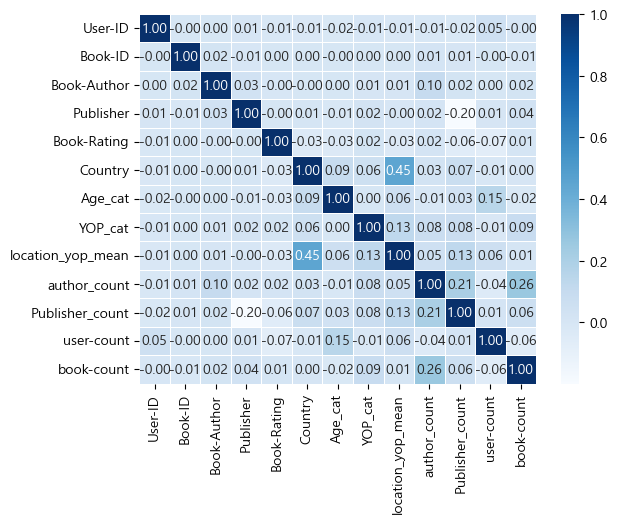

In [35]:
train['location_yop_mean'] = train.groupby("Country")['YOP_cat'].transform('mean')

temp = dict(train['Book-Author'].value_counts())
train['author_count'] = train.apply(lambda x: temp[x['Book-Author']], axis=1)

temp = dict(train['Publisher'].value_counts())
train['Publisher_count'] = train.apply(lambda x: temp[x['Publisher']], axis=1)

temp = dict(train['User-ID'].value_counts())
train['user-count'] = train.apply(lambda x: temp[x['User-ID']], axis=1)

temp = dict(train['Book-ID'].value_counts())
train['book-count'] = train.apply(lambda x: temp[x['Book-ID']], axis=1)

corr = train.corr()
sns.heatmap(corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [36]:
train.columns

Index(['User-ID', 'Book-ID', 'Book-Author', 'Publisher', 'Book-Rating',
       'Country', 'Age_cat', 'YOP_cat', 'location_yop_mean', 'author_count',
       'Publisher_count', 'user-count', 'book-count'],
      dtype='object')

In [38]:
train

,User-ID,Book-ID,Book-Author,Publisher,Country,Age_cat,YOP_cat,location_yop_mean,author_count,Publisher_count,user-count,book-count,Book-Rating
0,0,39921,77475,9093,54,3,11,9.924804,106,6510,8,14,8
1,0,73045,91647,10515,54,3,9,9.924804,1414,14299,8,6,8
2,0,78014,90102,10515,54,3,9,9.924804,24,14299,8,2,0
3,0,88719,83754,1166,54,3,10,9.924804,79,14797,8,23,0
4,0,162881,54167,12609,54,3,9,9.924804,110,16018,8,53,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871388,83251,72982,52004,6162,298,4,10,10.055824,8,5648,1,2,0
871389,83252,232668,16876,6091,298,4,11,10.055824,121,297,1,21,0
871390,83253,64665,36822,13698,54,5,11,9.924804,2431,200,1,5,0
871391,83254,227657,87010,12989,298,5,10,10.055824,9,3202,1,2,8


<AxesSubplot: >

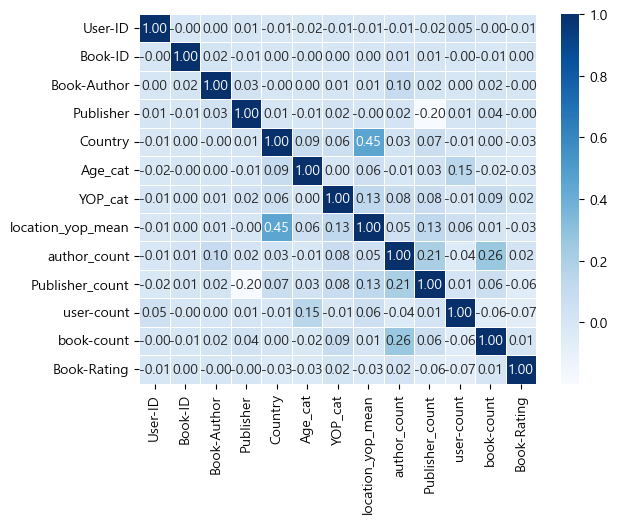

In [39]:
corr = train.corr()
sns.heatmap(corr, annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')